In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df_hogar = pd.read_csv('../files/01_csv/csv_consolidated/hogar.csv')
df_persona = pd.read_csv('../files/01_csv/csv_consolidated/persona.csv')
df_vivienda = pd.read_csv('../files/01_csv/csv_consolidated/vivienda.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_hogar.head()

,ID1,HHID,HV012,HV013,HV024,HV025
0,2014,252300501,4,4,Lima,Urbano
1,2014,252301601,11,11,Lima,Urbano
2,2014,252302701,5,5,Lima,Urbano
3,2014,252303801,8,8,Lima,Urbano
4,2014,252304901,3,3,Lima,Urbano


In [4]:
df_persona.head()

,ID1,HHID,HVIDX,HV104,HV105,HV109
0,2014,142700601,1,Femenino,18,Superior
1,2014,142701701,1,Masculino,34,Superior
2,2014,142701701,2,Femenino,35,Superior
3,2014,142701701,3,Femenino,12,Secundaria incompleta
4,2014,142701701,4,Femenino,8,Primeria incompleta


In [5]:
df_vivienda.head()

,ID1,HHID,HV201,HV205,HV213,HV270
0,2014,142700601,Red fuera de la vivienda pero dentro de la edi...,Conectado a red publica fuera de la vivienda,Cemento / Ladrillo,3 - Medio
1,2014,142701701,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,3 - Medio
2,2014,142702901,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Losetas / terrazos,4 - Rico
3,2014,142704001,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Losetas / terrazos,5 - Muy rico
4,2014,142705101,Red fuera de la vivienda pero dentro de la edi...,Conectado a red publica fuera de la vivienda,Cemento / Ladrillo,2 - Pobre


In [6]:
print(df_hogar.shape)
print(df_vivienda.shape)
print(df_persona.shape)

(215255, 6)
(197430, 6)
(833507, 6)


In [7]:
df_home = pd.merge(df_hogar, df_vivienda, how='inner', on=['ID1', 'HHID'])

In [8]:
df_full = pd.merge(df_home, df_persona, how='inner', on=['ID1', 'HHID'])

In [9]:
df_full.shape

(818990, 14)

In [10]:
df_full.head()

,ID1,HHID,HV012,HV013,HV024,HV025,HV201,HV205,HV213,HV270,HVIDX,HV104,HV105,HV109
0,2014,252300501,4,4,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,5 - Muy rico,1,Masculino,38,Secundaria incompleta
1,2014,252300501,4,4,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,5 - Muy rico,2,Femenino,32,Secundaria incompleta
2,2014,252300501,4,4,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,5 - Muy rico,3,Masculino,13,Secundaria incompleta
3,2014,252300501,4,4,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,5 - Muy rico,4,Femenino,5,Sin educacion
4,2014,252301601,11,11,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,4 - Rico,1,Masculino,50,Secundaria incompleta


In [11]:
import lightgbm as lgbm

In [12]:
df_full.describe()

,ID1,HHID,HV012,HV013,HVIDX
count,818990.000000,8.189900e+05,818990.000000,818990.000000,818990.000000
mean,2016.597134,1.680058e+08,4.982530,4.843755,3.048064
std,1.665514,9.015534e+07,2.101843,2.179731,1.903678
min,2014.000000,1.002010e+05,0.000000,0.000000,1.000000
25%,2015.000000,9.221420e+07,4.000000,3.000000,2.000000
50%,2017.000000,1.742083e+08,5.000000,5.000000,3.000000
75%,2018.000000,2.431088e+08,6.000000,6.000000,4.000000
max,2019.000000,3.254074e+08,21.000000,21.000000,21.000000


In [13]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818990 entries, 0 to 818989
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID1     818990 non-null  int64 
 1   HHID    818990 non-null  int64 
 2   HV012   818990 non-null  int64 
 3   HV013   818990 non-null  int64 
 4   HV024   818990 non-null  object
 5   HV025   818990 non-null  object
 6   HV201   818990 non-null  object
 7   HV205   818990 non-null  object
 8   HV213   818990 non-null  object
 9   HV270   818990 non-null  object
 10  HVIDX   818990 non-null  int64 
 11  HV104   818990 non-null  object
 12  HV105   818990 non-null  object
 13  HV109   818990 non-null  object
dtypes: int64(5), object(9)
memory usage: 93.7+ MB


In [14]:
df_full.columns

Index(['ID1', 'HHID', 'HV012', 'HV013', 'HV024', 'HV025', 'HV201', 'HV205',
       'HV213', 'HV270', 'HVIDX', 'HV104', 'HV105', 'HV109'],
      dtype='object')

In [15]:
df_full.columns = ['anho', 'casa_id', 'nro_vivientes_jure',
                   'nro_vivientes_facto','region','area_residencia',
                   'fuente_agua','tipo_banho','tipo_piso','indice_riqueza',
                   'persona_id','sexo','edad','educacion'
                  ]

In [16]:
df_full.head()

,anho,casa_id,nro_vivientes_jure,nro_vivientes_facto,region,area_residencia,fuente_agua,tipo_banho,tipo_piso,indice_riqueza,persona_id,sexo,edad,educacion
0,2014,252300501,4,4,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,5 - Muy rico,1,Masculino,38,Secundaria incompleta
1,2014,252300501,4,4,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,5 - Muy rico,2,Femenino,32,Secundaria incompleta
2,2014,252300501,4,4,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,5 - Muy rico,3,Masculino,13,Secundaria incompleta
3,2014,252300501,4,4,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,5 - Muy rico,4,Femenino,5,Sin educacion
4,2014,252301601,11,11,Lima,Urbano,Red dentro de la vivienda,Conectado a red publica dentro de la vivienda,Cemento / Ladrillo,4 - Rico,1,Masculino,50,Secundaria incompleta


In [17]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818990 entries, 0 to 818989
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   anho                 818990 non-null  int64 
 1   casa_id              818990 non-null  int64 
 2   nro_vivientes_jure   818990 non-null  int64 
 3   nro_vivientes_facto  818990 non-null  int64 
 4   region               818990 non-null  object
 5   area_residencia      818990 non-null  object
 6   fuente_agua          818990 non-null  object
 7   tipo_banho           818990 non-null  object
 8   tipo_piso            818990 non-null  object
 9   indice_riqueza       818990 non-null  object
 10  persona_id           818990 non-null  int64 
 11  sexo                 818990 non-null  object
 12  edad                 818990 non-null  object
 13  educacion            818990 non-null  object
dtypes: int64(5), object(9)
memory usage: 93.7+ MB


In [18]:
df_full.edad.value_counts()

3      19240
4      19029
2      18614
1      18191
0      16053
       ...  
94        49
95        49
97+       38
98        10
98         1
Name: edad, Length: 199, dtype: int64

In [21]:
df_full.loc[df_full['edad'] == '97+', 'edad'] = 97
df_full.loc[df_full['edad'] == 98, 'edad'] = np.nan
df_full.loc[df_full['edad'] == '98', 'edad'] = np.nan

In [20]:
df_full.shape

(818990, 14)

In [22]:
df_full = df_full[df_full['edad'].notnull()]

In [23]:
df_full.shape

(818979, 14)

In [24]:
df_full.edad = df_full.edad.astype(int)

In [25]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818979 entries, 0 to 818989
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   anho                 818979 non-null  int64 
 1   casa_id              818979 non-null  int64 
 2   nro_vivientes_jure   818979 non-null  int64 
 3   nro_vivientes_facto  818979 non-null  int64 
 4   region               818979 non-null  object
 5   area_residencia      818979 non-null  object
 6   fuente_agua          818979 non-null  object
 7   tipo_banho           818979 non-null  object
 8   tipo_piso            818979 non-null  object
 9   indice_riqueza       818979 non-null  object
 10  persona_id           818979 non-null  int64 
 11  sexo                 818979 non-null  object
 12  edad                 818979 non-null  int32 
 13  educacion            818979 non-null  object
dtypes: int32(1), int64(5), object(8)
memory usage: 90.6+ MB


In [26]:
cols_fit = ['nro_vivientes_jure', 'nro_vivientes_facto','region','area_residencia',
                   'tipo_banho','tipo_piso','indice_riqueza',
                   'sexo','edad','educacion']

In [27]:
col_target = 'fuente_agua'

## Fitting respect fuente_agua

In [28]:
parameters = {
    'application': 'multiclass',
    'objective': 'softmax',
    'metric': 'multi_logloss',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0,
    'num_class': 11
}

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818979 entries, 0 to 818989
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   anho                 818979 non-null  int64 
 1   casa_id              818979 non-null  int64 
 2   nro_vivientes_jure   818979 non-null  int64 
 3   nro_vivientes_facto  818979 non-null  int64 
 4   region               818979 non-null  object
 5   area_residencia      818979 non-null  object
 6   fuente_agua          818979 non-null  object
 7   tipo_banho           818979 non-null  object
 8   tipo_piso            818979 non-null  object
 9   indice_riqueza       818979 non-null  object
 10  persona_id           818979 non-null  int64 
 11  sexo                 818979 non-null  object
 12  edad                 818979 non-null  int32 
 13  educacion            818979 non-null  object
dtypes: int32(1), int64(5), object(8)
memory usage: 90.6+ MB


In [31]:
df_full.fuente_agua.value_counts(dropna=False)

Red dentro de la vivienda                                 591849
Agua embotellada                                           65112
Red fuera de la vivienda pero dentro de la edificacion     37236
Otro                                                       28303
Rio / acequia / laguna                                     26681
Manantial                                                  17236
Pilon o grifo publico                                      16404
Pozo dentro de la vivienda                                 12906
Camion cisterna                                            12306
Pozo publico                                                8290
Agua de lluvia                                              2656
Name: fuente_agua, dtype: int64

In [32]:
df_full.loc[:, df_full.dtypes == 'object'] =\
    df_full.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

In [33]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818979 entries, 0 to 818989
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   anho                 818979 non-null  int64   
 1   casa_id              818979 non-null  int64   
 2   nro_vivientes_jure   818979 non-null  int64   
 3   nro_vivientes_facto  818979 non-null  int64   
 4   region               818979 non-null  category
 5   area_residencia      818979 non-null  category
 6   fuente_agua          818979 non-null  category
 7   tipo_banho           818979 non-null  category
 8   tipo_piso            818979 non-null  category
 9   indice_riqueza       818979 non-null  category
 10  persona_id           818979 non-null  int64   
 11  sexo                 818979 non-null  category
 12  edad                 818979 non-null  int32   
 13  educacion            818979 non-null  category
dtypes: category(8), int32(1), int64(5)
memory usage: 46.

In [47]:
df_full.to_csv('../files/01_csv/csv_consolidated/pitch.csv',index=False)

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
feature= df_full[cols_fit]
target= le.fit_transform(df_full[col_target])
feature_train, feature_test, target_train, target_test= train_test_split(feature, target, test_size=0.20)

In [51]:
train_data = lgbm.Dataset(feature_train, label=target_train)
test_data = lgbm.Dataset(feature_test, label=target_test)

In [ ]:
model = lgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

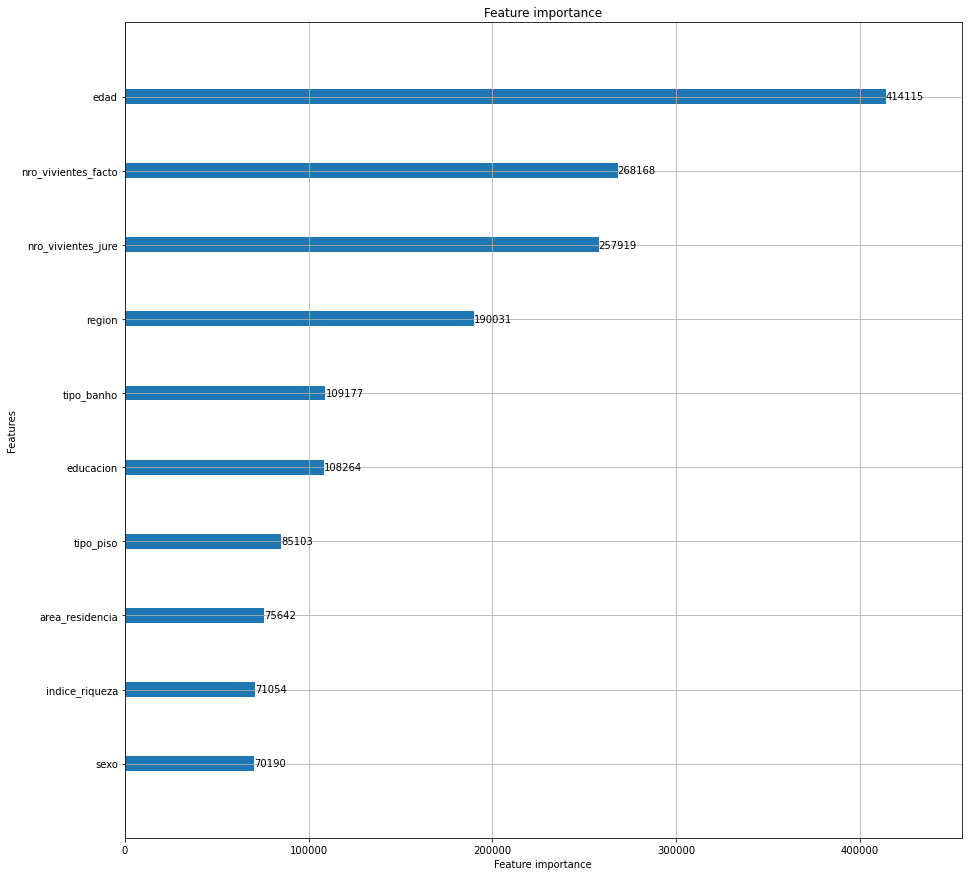

In [55]:
ax = lgbm.plot_importance(model, max_num_features=40, figsize=(15,15))

In [56]:
ax.figure.savefig('../files/08_plots/feat_imp_fuente_agua.png')